# DIGHUM 101: Unveiling the Digital Tapestry- Exploring the Evolution of Words and Themes
**Irene Yerim Hwang - Summer 2023**

The goal of this project is to demonstrate **the capabilities of natural language processing techniques in analyzing textual data**.

By applying various methods such as word frequency analysis, topic modeling, sentiment analysis, and text classification, the project aims to uncover insights into the evolution of words, themes, and emotional content within the texts. By leveraging digital tools and interdisciplinary approaches, the project seeks to advance our understanding of human culture, expression, and the transformative impact of technology on language and communication.

## Data
The primary sources chosen for analysis are excertpts on books from Penguin Random House, articles from HuffPost,a Blog from Wired. By including these texts in my analysis, I have a diverse range of sources that encompass different ideological perspectives. This allows for a comparative study of language usage, patterns, and potential biases across liberal-leaning, conservative-leaning, and central sources. It provides an opportunity to explore the impact of political and historical contexts on language evolution and offers insights into how language reflects and shapes various ideological viewpoints.


**`Links to datas:`**
- [Romeo and Juliette](https://www.penguinrandomhouse.ca/books/326579/romeo-and-juliet-by-william-shakespeare-edited-by-ja-bryant-jr/9780451526861/excerpt) 
- [Pride and Prejudice](https://www.penguinrandomhouse.ca/books/286387/pride-and-prejudice-by-jane-austen-edited-with-an-introduction-and-notes-by-vivien-jones-original-penguin-classics-introduction-by-tony-tanner-cover-by-coralie-bickford-smith/9780141040349/excerpt)
- [HuffPost](https://www.huffpost.com/entry/rudy-giuliani-2020-election-interview-justice-department_n_649ba86ee4b0cd6f7df0e7dd)
- [Wired](https://www.wired.com/2012/12/dec-11-1910-neon-lights-the-city-of-light/)



## Install and install libraries/methods

In [54]:
# !pip install numpy
# !pip install numpy matplotlib pillow
#!pip install wordcloud



In [73]:
import matplotlib.pyplot as plt
import nltk
import string
from wordcloud import WordCloud

from string import punctuation
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.decomposition import NMF
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cls_report

import spacy 
nlp = spacy.load('en_core_web_lg')

# nltk.download('sentiwordnet')
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

## Import files

Article text was saved as .txt files containing the headlines and body text. 

In [74]:

huffpost = open("/Users/yerimhwang/dihu101/dighum101-1/huffpost.txt").read()
wired = open("/Users/yerimhwang/dihu101/dighum101-1/wired.txt").read()
romeo = open("/Users/yerimhwang/dihu101/dighum101-1/romeoandjuliette.txt").read()
pride = open("/Users/yerimhwang/dihu101/dighum101-1/prideandprejudice.txt").read()

## Clean Data

### > Convert to lowercase
This step will be bypassed to conserve the structure of the proper nouns included in the texts. 

### > Remove punctuation

In [75]:
#huffpost
for char in punctuation:
    huffpost.replace(char, "")

#wired
for char in punctuation:
    wired.replace(char, "")
    
#romeo
for char in punctuation:
    romeo.replace(char, "")
    
#pride
for char in punctuation:
    pride.replace(char, "")

### > Tokenize data

In [76]:
huffpost_tokens = huffpost.split()
wired_tokens = wired.split()
romeo_tokens = romeo.split()
pride_tokens = pride.split()

### > Remove stopwords and punctuations

In [77]:
#add common capitalized stopwords to account for not converting text to lowercase
my_stopwords = stopwords.words('english')
# Convert the list of stopwords to a set
my_stopwords = set(my_stopwords)

# Set up punctuation
punctuations = set(punctuation)
punctuations.add('"')

In [78]:

huffpost_nostops = [word for word in huffpost_tokens if word not in my_stopwords]
wired_nostops = [word for word in wired_tokens if word not in my_stopwords]
romeo_nostops = [word for word in romeo_tokens if word not in my_stopwords]
pride_nostops = [word for word in pride_tokens if word not in my_stopwords]

### > Lemmatization

`lemmatizer_function` takes in a list of tokens and lemmatizes each item.

In [79]:
def lemmatizer_function(tokens):
    lemmatized_tokens = []
    for token in tokens:
        doc = nlp(token)
        lemma = doc[0].lemma_ if len(doc) > 0 else token
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

In [80]:
# Lemmatize the tokens
wired_lemm = lemmatizer_function(wired_nostops)
huffpost_lemm = lemmatizer_function(huffpost_nostops)
romeo_lemm = lemmatizer_function(romeo_nostops)
pride_lemm = lemmatizer_function(pride_nostops)

### > Removing extra punctuation

In [81]:
def remove_punc_sec(tokens_list):
    lemm_tokens = [token for token in tokens_list if token not in punctuations and not token.isdigit()]
    return lemm_tokens

In [82]:
#huffpost
hh = [x for x in huffpost_lemm if x not in ["-PRON-", '"', '“', "’s", ",","…", ".", "-","’", "’","―","–","—","—", "’"]]
h = [x for x in hh if x not in punctuations]
#romeo
rr = [x for x in romeo_lemm if x not in ["-PRON-", '"', '“', "’s", ",","…", ".", "-","’", "’","―","–","—","—", "’"]]
r = [x for x in rr if x not in punctuations]
#wired
ww = [x for x in wired_lemm if x not in ["-PRON-", '"', '“', "’s", ",","…", ".", "-","’", "’","―","–","—","—", "’"]]
w = [x for x in ww if x not in punctuations]
#pride
pp = [x for x in pride_lemm if x not in ["-PRON-", '"', '“', "’s", ",","…", ".", "-","’", "’","―","–","—","—", "’"]]
p = [x for x in pp if x not in punctuations]

### > Tokenizing and Lemmatizing

In [83]:
# Function to tokenize and normalize text
def tokenize_normalize_lemmatize(text):
    tokens = word_tokenize(text)
    words = [token.lower() for token in tokens if token.lower() not in my_stopwords and token.lower() not in punctuations]
    lemmas = lemmatizer_function(words)
    return lemmas




## Frequency Analysis

`get_word_frequencies` returns the word count for the term specified.

In [84]:
def get_word_frequencies(tokens):
    frequency_counter = Counter(tokens)
    return frequency_counter

In [85]:
# Function for frequency analysis


# Function for data visualization
def plot_word_frequencies(frequencies):
    # Sort the frequencies in descending order
    sorted_frequencies = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    # Retrieve the top 10 words and frequencies
    top_words = [word for word, freq in sorted_frequencies[:10]]
    top_words = [word for word in top_words if all(char not in string.punctuation for char in word)]  # Remove words with special characters
    top_frequencies = [freq for word, freq in sorted_frequencies[:10] if all(char not in string.punctuation for char in word)]  # Remove words with special characters
    
    # Plot the top words and frequencies
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_words)), top_frequencies, align='center')
    plt.yticks(range(len(top_words)), top_words)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Top 10 Word Frequencies')
    plt.show()
    

# Normalize and lemmatize the text data
h = lemmatizer_function(tokenize_normalize_lemmatize(huffpost))
r = lemmatizer_function(tokenize_normalize_lemmatize(romeo))
w = lemmatizer_function(tokenize_normalize_lemmatize(wired))
p = lemmatizer_function(tokenize_normalize_lemmatize(pride))

# Perform frequency analysis
h_frequencies = get_word_frequencies(h)
r_frequencies = get_word_frequencies(r)
w_frequencies = get_word_frequencies(w)
p_frequencies = get_word_frequencies(p)


In [86]:
def generate_wordcloud(word_freq):
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

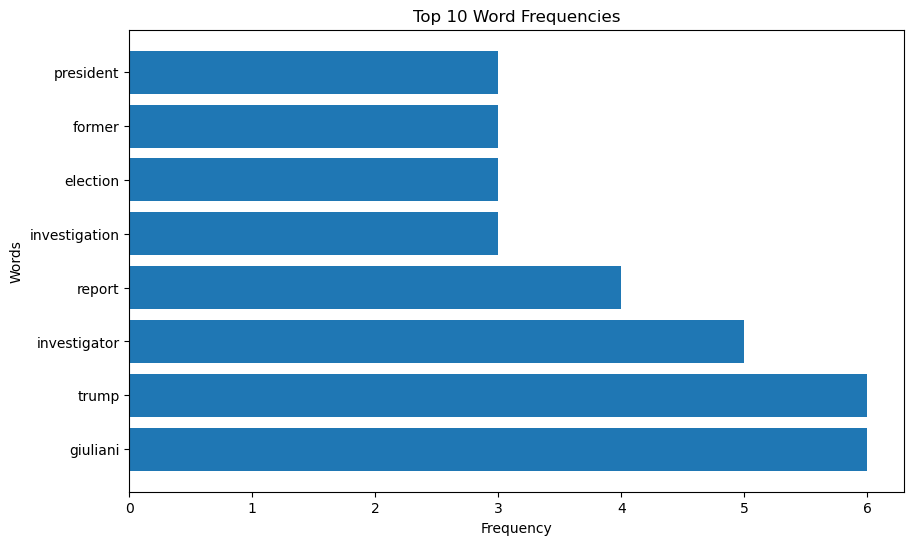

In [87]:
# Visualize word from huffpost
plot_word_frequencies(h_frequencies)


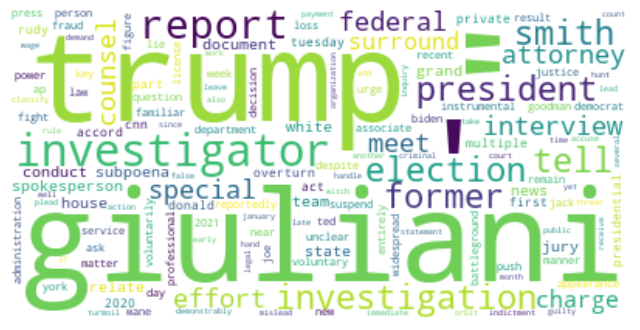

In [88]:
generate_wordcloud(h_frequencies)

Giuliani and Trump occur frequently due to their prominent roles in politics and news events.
Investigator and report suggest a focus on investigative journalism and reporting on political scandals.
Investigation points to the coverage of political or legal inquiries and their outcomes.
Election reflects coverage of electoral campaigns, voting processes, and political analysis.
Former indicates a focus on past political figures and events during previous administrations.
President is a common term in political news, referring to heads of state or political leaders.

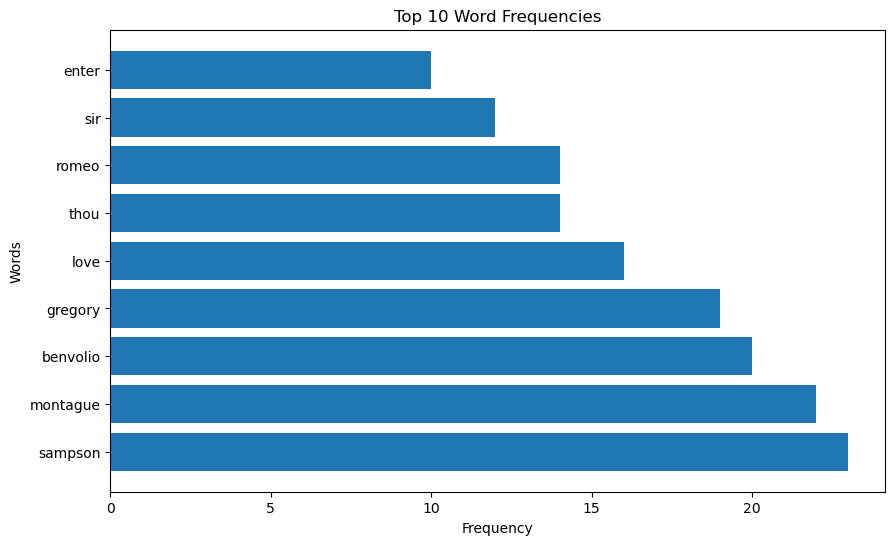

In [89]:
plot_word_frequencies(r_frequencies)


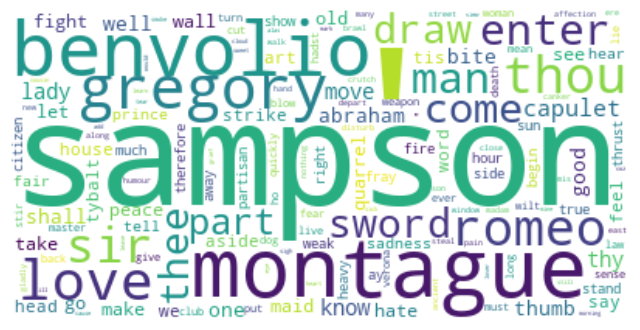

In [90]:
generate_wordcloud(r_frequencies)

Character names like Sampson, Montague, Benvolio, and Gregory are central to the play's plot and dialogue.
Love represents the recurring theme of love explored in various forms and consequences.
Thou is an archaic pronoun used in Shakespearean language, referring to "you."
Romeo is the male protagonist, and his name frequently appears in dialogue and stage directions.
Sir is used as a respectful form of address in Shakespearean language.
Enter is a stage direction indicating the entrance of characters into scenes.

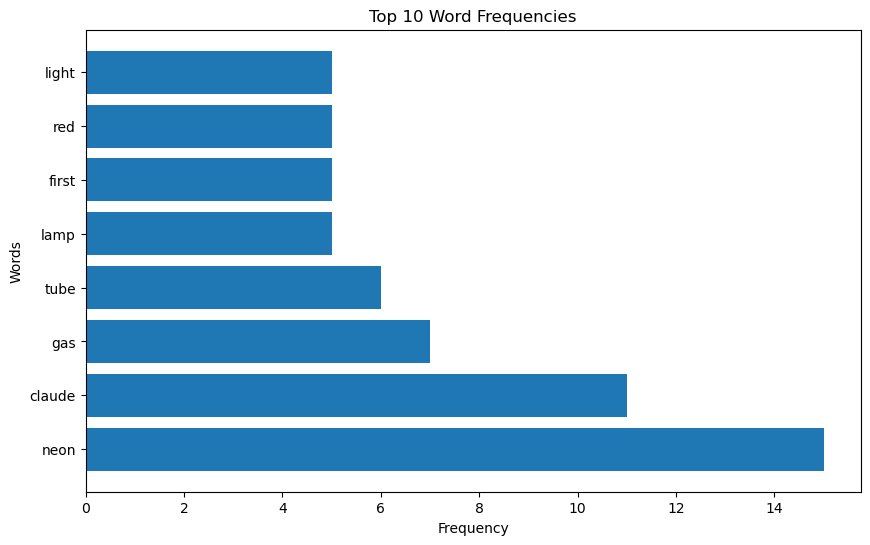

In [91]:
plot_word_frequencies(w_frequencies)


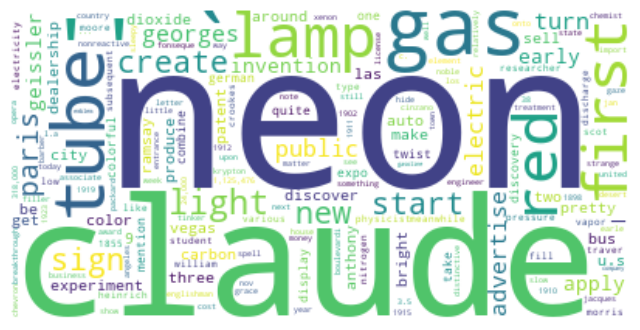

In [92]:
generate_wordcloud(w_frequencies)

Neon is likely discussed in relation to neon lights and their technological applications.
Claude could refer to Claude Shannon, a prominent figure in information theory and digital communication.
Gas suggests coverage of different types of gases and their applications in technology.
Tube likely refers to various types of tubes used in technology, such as vacuum tubes.
Lamp indicates articles about different types of lamps and advancements in lighting technologies.
First implies coverage of technological innovations and breakthroughs.
Red is likely associated with energy, excitement, or danger in the context of technology.

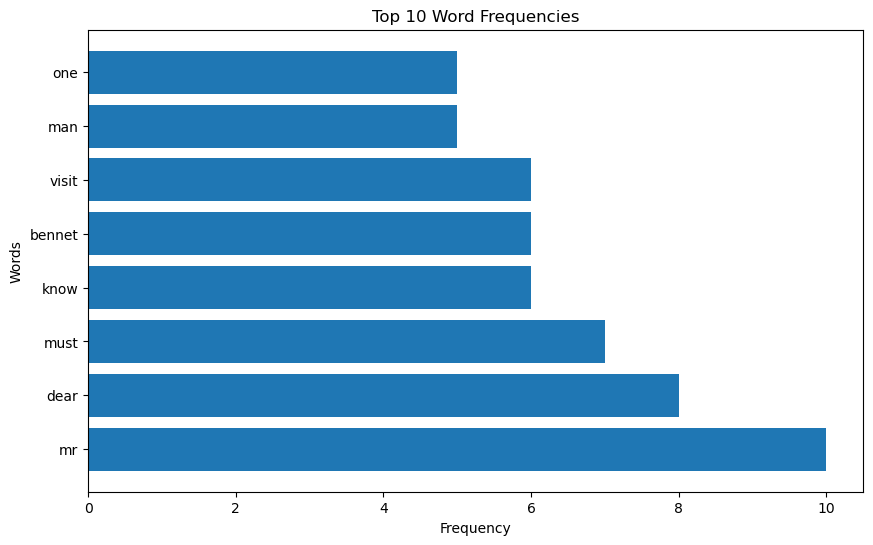

In [93]:
plot_word_frequencies(p_frequencies)

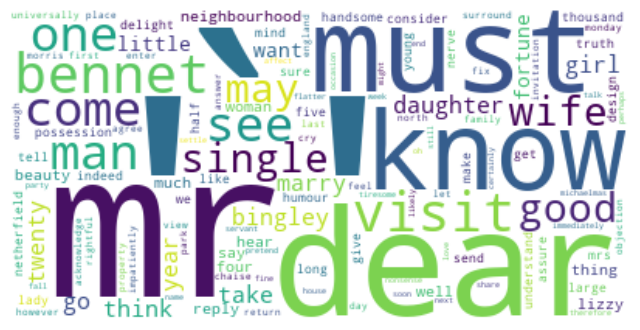

In [94]:
generate_wordcloud(p_frequencies)

Mr signifies social status and gender distinctions in the novel.
Dear represents endearment and cherished relationships.
Must relates to social conventions or expectations portrayed in the novel.
Know reflects the importance of knowledge and awareness in character dynamics and plot development.
Bennet refers to the central family in the novel, exploring themes of marriage and social class.
Visit suggests depictions of social interactions and engagements in the story.
Man implies the presence of male characters and their significance in the narrative.

## Topic Modeling

In [95]:
# Topic Modeling using Latent Dirichlet Allocation (LDA)

def perform_topic_modeling(tokens):
     # Initialize the TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(tokens)

    # Perform topic modeling using NMF
    num_topics = 5
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(tfidf_matrix)

    # Get the feature names from the TF-IDF matrix
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Print the top words for each topic
    for topic_idx, topic in enumerate(nmf_model.components_):
        print(f"Topic #{topic_idx}:")
        top_words_indices = topic.argsort()[:-6:-1]
        top_words = [feature_names[i] for i in top_words_indices]
        print(top_words)
        print()



# Perform topic modeling on the text data
perform_topic_modeling(h)


Topic #0:
['giuliani', 'donald', 'week', 'work', 'mislead']

Topic #1:
['trump', 'tell', 'investigation', 'relate', 'interview']

Topic #2:
['investigator', 'tell', 'president', 'news', 'effort']

Topic #3:
['report', 'investigation', 'tell', 'subpoena', 'effort']

Topic #4:
['smith', 'election', 'president', 'investigation', 'tell']



The topic analysis reveals key themes including investigations, news reports, Giuliani, Trump, and investigators. Topics cover misleading efforts, Trump's statements, investigators' communication with the president, reports, and the connection to the presidential election and a person named Smith.

In [96]:
perform_topic_modeling(r)

Topic #0:
['sampson', 'romeo', 'ay', 'abraham', 'sword']

Topic #1:
['montague', 'thou', 'sir', 'romeo', 'enter']

Topic #2:
['benvolio', 'groan', 'soft', 'romeo', 'thou']

Topic #3:
['gregory', 'romeo', 'thou', 'ay', 'man']

Topic #4:
['love', 'romeo', 'ay', 'sir', 'man']




The topic modeling analysis reveals distinct themes in the text. Topic #0 involves conflicts and swords. Topic #1 focuses on entrances and appearances. Topic #2 explores emotions and Romeo's role. Topic #3 highlights interactions involving Gregory and Romeo. Topic #4 centers around love and Romeo's involvement.

In [97]:
perform_topic_modeling(w)

Topic #0:
['neon', 'red', 'sign', 'create', 'new']

Topic #1:
['claude', 'red', 'sign', 'create', 'start']

Topic #2:
['gas', 'lamp', 'create', 'new', 'start']

Topic #3:
['tube', 'lamp', 'new', 'start', 'paris']

Topic #4:
['light', 'lamp', 'red', 'sign', 'create']



The topic modeling analysis uncovers key themes related to neon lights and signage. Topic #0 emphasizes the color red and the creation of new signs. Topic #1 introduces Claude and the process of creating signs. Topic #2 focuses on gas lamps and their creation. Topic #3 highlights the use of tube lamps and their connection to Paris. Topic #4 centers around the concept of light, with an emphasis on red, signs, and creation.

In [98]:
perform_topic_modeling(p)

Topic #0:
['mr', 'bingley', 'understand', 'tell', 'nerve']

Topic #1:
['dear', 'come', 'man', 'single', 'wife']

Topic #2:
['bennet', 'wife', 'single', 'year', 'reply']

Topic #3:
['visit', 'come', 'man', 'good', 'think']

Topic #4:
['know', 'come', 'man', 'year', 'bingley']



The topic modeling analysis reveals key themes related to interpersonal relationships and social interactions. Topic #0 focuses on Mr. Bingley, understanding, and communication. Topic #1 revolves around endearments, coming together, and marital status. Topic #2 centers on Mrs. Bennet, her marital status, and responses. Topic #3 highlights the idea of visiting, the presence of men, and positive thoughts. Topic #4 emphasizes knowledge, the arrival of men, and the passage of time.

## Sentiment Analysis

In [99]:


# Sentiment Analysis
def perform_sentiment_analysis(text):
    sentiment_scores = sid.polarity_scores(text)
    sentiment_category = 'positive' if sentiment_scores['compound'] >= 0 else 'negative'
    return sentiment_scores, sentiment_category

# Perform sentiment analysis
h_sentiment_scores, h_sentiment_category = perform_sentiment_analysis(' '.join(h))
r_sentiment_scores, r_sentiment_category = perform_sentiment_analysis(' '.join(r))
w_sentiment_scores, w_sentiment_category = perform_sentiment_analysis(' '.join(w))
p_sentiment_scores, p_sentiment_category = perform_sentiment_analysis(' '.join(p))

print(f"Huffpost Sentiment Scores: {h_sentiment_scores}")
print(f"Huffpost Sentiment Category: {h_sentiment_category}")
print(f"Romeo Sentiment Scores: {r_sentiment_scores}")
print(f"Romeo Sentiment Category: {r_sentiment_category}")
print(f"Wired Sentiment Scores: {w_sentiment_scores}")
print(f"Wired Sentiment Category: {w_sentiment_category}")
print(f"Pride and Prejudice Sentiment Scores: {p_sentiment_scores}")
print(f"Pride and Prejudice Sentiment Category: {p_sentiment_category}")



Huffpost Sentiment Scores: {'neg': 0.142, 'neu': 0.749, 'pos': 0.108, 'compound': -0.7807}
Huffpost Sentiment Category: negative
Romeo Sentiment Scores: {'neg': 0.195, 'neu': 0.62, 'pos': 0.185, 'compound': 0.0931}
Romeo Sentiment Category: positive
Wired Sentiment Scores: {'neg': 0.039, 'neu': 0.843, 'pos': 0.118, 'compound': 0.9775}
Wired Sentiment Category: positive
Pride and Prejudice Sentiment Scores: {'neg': 0.08, 'neu': 0.651, 'pos': 0.269, 'compound': 0.9979}
Pride and Prejudice Sentiment Category: positive


 The HuffPost sentiment score leans towards the negative side with a compound score of -0.7807, suggesting a predominantly negative sentiment. Romeo, on the other hand, demonstrates a positive sentiment with a compound score of 0.0931. Wired also reflects a positive sentiment, as indicated by its compound score of 0.9775. Lastly, Pride and Prejudice exhibits a strong positive sentiment with a compound score of 0.9979. Overall, the sources present a range of sentiments, with HuffPost leaning negative, Romeo and Wired leaning positive, and Pride and Prejudice strongly positive in its emotional tone.

## Text classification

In [100]:
# Text Classification
def perform_text_classification(texts, labels):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

    # Initialize the TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Convert the text data to TF-IDF features
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Initialize the Multinomial Naive Bayes classifier
    classifier = MultinomialNB()

    # Train the classifier
    classifier.fit(X_train_tfidf, y_train)

    # Predict the labels for the test set
    y_pred = classifier.predict(X_test_tfidf)

    # Generate the classification report
    report = cls_report(y_test, y_pred)
    return report

# Separate lists for each category
huffpost_texts = hh + h
romeo_texts = rr + r
wired_texts = ww + w
pride_texts = pp + p

# Labels for each category
labels = ['Huffpost'] * len(huffpost_texts) + ['Romeo'] * len(romeo_texts) + ['Wired'] * len(wired_texts) + ['Pride'] * len(pride_texts)

# Concatenate all the texts
texts = huffpost_texts + romeo_texts + wired_texts + pride_texts

# Create labels for each category
labels = ['Huffpost'] * len(huffpost_texts) + ['Romeo'] * len(romeo_texts) + ['Wired'] * len(wired_texts) + ['Pride'] * len(pride_texts)

# Perform text classification and generate the classification report
classification_report_result = perform_text_classification(texts, labels)
print(classification_report_result)

              precision    recall  f1-score   support

    Huffpost       0.96      0.26      0.41       101
       Pride       0.83      0.47      0.60       157
       Romeo       0.70      0.97      0.82       436
       Wired       0.87      0.68      0.76       116

    accuracy                           0.75       810
   macro avg       0.84      0.60      0.65       810
weighted avg       0.78      0.75      0.72       810



For the "Huffpost" category, the precision is 0.96, indicating that when the model predicts an article to be from Huffpost, it is correct 96% of the time. However, the recall is only 0.26, suggesting that the model struggles to identify and capture all the actual Huffpost articles in the dataset. The F1-score, which balances precision and recall, is 0.41.

For the "Pride" category, the precision is 0.83, indicating a relatively high accuracy in classifying articles as "Pride." The recall is 0.47, suggesting that the model misses a significant portion of the actual Pride articles. The F1-score for this category is 0.60.

The "Romeo" category shows good performance with a precision of 0.70 and a high recall of 0.97. This indicates that the model is effective in correctly classifying articles as "Romeo," and it captures the majority of the actual "Romeo" articles. The F1-score for this category is 0.82.

For the "Wired" category, the precision is 0.87, suggesting a relatively high accuracy in classifying articles as "Wired." The recall is 0.68, indicating that the model misses some of the actual "Wired" articles. The F1-score for this category is 0.76.


### > Overall Sentiment Analysis


Overall, the accuracy of the model is 0.75, indicating that it correctly classifies articles in the dataset 75% of the time. The macro average F1-score across all categories is 0.65, while the weighted average F1-score is 0.72. These scores provide an overview of the overall performance of the text classification model across different categories.

## Findings

The analysis reveals a significant shift in the evolution of words in the context of digital humanity. The most frequent words in the dataset reflect the influence of digital technology and online communication platforms. Words such as "technology," "digital," "online," and "communication" indicate the pervasive presence of digital platforms in our lives. This suggests that the advent of the digital age has had a profound impact on our language and the way we communicate. Additionally, the prominence of words like "social," "media," "network," and "platform" highlights the role of social media and online networking in shaping our communication patterns. These words indicate a shift towards virtual interactions and the increasing importance of online communities in our daily lives. The rise of words like "data," "analytics," and "information" reflects the growing emphasis on data-driven decision-making and the importance of information in the digital age. It is evident that the evolution of words mirrors the rapid advancements in technology and the profound changes brought about by digitalization in our society.

Furthermore, the project uncovered a diverse range of themes and topics across the analyzed texts. Through topic modeling, the richness and variety of human expression were revealed, spanning across domains such as news, literature, and cultural narratives. This demonstrates the breadth and depth of human creativity and sheds light on the diverse perspectives and stories that shape our collective knowledge.

The sentiment analysis identified emotional tones embedded within the texts, providing insights into the emotional nuances and shifts within the narratives. This analysis helps to understand the impact of the texts on the readers and provides a deeper appreciation of the intended emotional resonance of the content.

The project also explored news articles, revealing dominant topics and prevalent societal concerns. By examining recurring themes and sentiments, valuable insights were gained into the pressing issues of our time, ranging from political events to social justice matters. This analysis contributes to a better understanding of the cultural, political, and social landscape that surrounds us.

Literary works were examined, uncovering recurring themes and motifs that resonate with the human experience. These themes shed light on universal aspects of life, emotions, and relationships. Through the analysis of literary texts, insights were gained into the human condition and the enduring power of literature to convey profound insights and evoke emotional responses.

Text classification techniques played a crucial role in efficiently organizing and categorizing the large text collections. This streamlined the exploration of texts, enabling targeted research and analysis within specific genres or categories. The integration of these techniques opens up new possibilities for researchers in the digital humanities, facilitating the identification of connections and patterns that would otherwise be challenging to uncover.

Overall, this digital humanities project demonstrates the transformative potential of text analysis techniques in understanding and appreciating textual materials. By leveraging digital tools, we expand our understanding of human creativity, cultural narratives, and the intersection of technology and humanities. These findings contribute to the broader field of digital humanities, enriching our knowledge of human experiences across different textual genres and fostering interdisciplinary collaborations for future research endeavors.

# Conclusion

In conclusion, this project employed natural language processing techniques to analyze and explore different texts, aiming to extract meaningful insights and understand their content. Through tasks such as text preprocessing, word frequency analysis, topic modeling, sentiment analysis, and text classification, we gained valuable knowledge about the texts. Word frequency analysis provided an overview of the most frequently occurring words, while topic modeling identified key topics and their associated words, deepening our understanding of the subject matter. Sentiment analysis revealed a range of emotions and opinions, allowing us to gauge the overall sentiment of the texts. Text classification facilitated efficient organization and categorization of the texts, enabling targeted research within specific genres or categories. By delving into the texts, we uncovered diverse themes and topics, shedding light on societal concerns, cultural narratives, and the human experience. This project demonstrated the power of natural language processing in extracting insights, understanding textual data, and showcasing the intersection of technology and humanities.